# Planning with Linear Programming

## Input Data

In [15]:
import pandas as pd

flow = pd.read_csv('../uk_data/flows.csv')

targets = flow['headings'].values[0:-1]
products = targets[0:-1]

flow.head(10)

,headings,"Products of agriculture, hunting and related services","Products of forestry, logging and related services",Fish and other fishing products; aquaculture products; support services to fishing,Coal and lignite,Extraction Of Crude Petroleum And Natural Gas & Mining Of Metal Ores,Other mining and quarrying products,Mining support services,Preserved meat and meat products,"Processed and preserved fish, crustaceans, molluscs, fruit and vegetables",...,Scientific research and development services NPISH,Veterinary services NPISH,Services to buildings and landscape NPISH,Education services NPISH,Human health services NPISH,Residential Care & Social Work Activities NPISH,"Creative, arts and entertainment services NPISH","Libraries, archives, museums and other cultural services NPISH",Sports services and amusement and recreation services NPISH,Services furnished by membership organisations NPISH
0,"Products of agriculture, hunting and related s...",2177,20,0,0,0,0,0,3148,828,...,0,0,0,24,4,0,1,0,0,2
1,"Products of forestry, logging and related serv...",1,136,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fish and other fishing products; aquaculture p...,0,0,46,0,0,0,0,0,345,...,0,0,0,0,0,0,0,0,0,0
3,Coal and lignite,0,0,0,34,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Extraction Of Crude Petroleum And Natural Gas ...,0,0,0,0,1007,0,38,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Other mining and quarrying products,0,0,0,0,0,409,0,0,0,...,0,0,0,0,0,0,1,0,0,4
6,Mining support services,0,0,0,0,3313,0,386,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Preserved meat and meat products,5,1,2,0,3,2,0,3400,10,...,0,1,1,20,2,8,1,1,0,2
8,"Processed and preserved fish, crustaceans, mol...",18,0,0,0,6,1,4,55,694,...,0,3,2,61,4,28,2,4,1,12
9,Vegetable and animal oils and fats,2,0,0,0,1,0,0,51,66,...,0,0,0,14,3,37,1,0,0,2


In [9]:
depreciation_rates = pd.read_csv('../uk_data/depreciation_rates.csv')
depreciation_rates.head(10)

,headings,"Products of agriculture, hunting and related services","Products of forestry, logging and related services",Fish and other fishing products; aquaculture products; support services to fishing,Coal and lignite,Extraction Of Crude Petroleum And Natural Gas & Mining Of Metal Ores,Other mining and quarrying products,Mining support services,Preserved meat and meat products,"Processed and preserved fish, crustaceans, molluscs, fruit and vegetables",...,Central Government,Local Authorities,Gross Fixed Capital Formation,Valuables,Changes in Inventories,Exports of Goods - EU,Exports of Goods - Non EU,Exports of Services - EU,Exports of Services - Non EU,Total Demand for Products at Basic Prices
0,"Products of agriculture, hunting and related s...",0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
1,"Products of forestry, logging and related serv...",0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2,Fish and other fishing products; aquaculture p...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
3,Coal and lignite,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
4,Extraction Of Crude Petroleum And Natural Gas ...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
5,Other mining and quarrying products,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
6,Mining support services,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
7,Preserved meat and meat products,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
8,"Processed and preserved fish, crustaceans, mol...",0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
9,Vegetable and animal oils and fats,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1


In [11]:
capital_stock = pd.read_csv('../uk_data/capital_stock.csv')
capital_stock.head(10)

,headings,"Products of agriculture, hunting and related services","Products of forestry, logging and related services",Fish and other fishing products; aquaculture products; support services to fishing,Coal and lignite,Extraction Of Crude Petroleum And Natural Gas & Mining Of Metal Ores,Other mining and quarrying products,Mining support services,Preserved meat and meat products,"Processed and preserved fish, crustaceans, molluscs, fruit and vegetables",...,Central Government,Local Authorities,Gross Fixed Capital Formation,Valuables,Changes in Inventories,Exports of Goods - EU,Exports of Goods - Non EU,Exports of Services - EU,Exports of Services - Non EU,Total Demand for Products at Basic Prices
0,"Products of agriculture, hunting and related s...",1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,"Products of forestry, logging and related serv...",1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,Fish and other fishing products; aquaculture p...,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,Coal and lignite,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,Extraction Of Crude Petroleum And Natural Gas ...,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,Other mining and quarrying products,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,Mining support services,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7,Preserved meat and meat products,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8,"Processed and preserved fish, crustaceans, mol...",1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9,Vegetable and animal oils and fats,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


### Planning Target

In [16]:
plan_targets = pd.read_csv('../uk_data/targets.csv')
plan_targets.head(10)

,headings,"Products of agriculture, hunting and related services","Products of forestry, logging and related services",Fish and other fishing products; aquaculture products; support services to fishing,Coal and lignite,Extraction Of Crude Petroleum And Natural Gas & Mining Of Metal Ores,Other mining and quarrying products,Mining support services,Preserved meat and meat products,"Processed and preserved fish, crustaceans, molluscs, fruit and vegetables",...,Veterinary services NPISH,Services to buildings and landscape NPISH,Education services NPISH,Human health services NPISH,Residential Care & Social Work Activities NPISH,"Creative, arts and entertainment services NPISH","Libraries, archives, museums and other cultural services NPISH",Sports services and amusement and recreation services NPISH,Services furnished by membership organisations NPISH,labor
0,year1,10685,373,986,464,10203,1698,1708,10775,5078,...,676,880,6167,1943,1310,976,600,252,4374,900000
1,year2,10685,373,986,464,10203,1698,1708,10775,5078,...,676,880,6167,1943,1310,976,600,252,4374,900000
2,year3,10685,373,986,464,10203,1698,1708,10775,5078,...,676,880,6167,1943,1310,976,600,252,4374,900000
3,year4,10685,373,986,464,10203,1698,1708,10775,5078,...,676,880,6167,1943,1310,976,600,252,4374,900000
4,year5,10685,373,986,464,10203,1698,1708,10775,5078,...,676,880,6167,1943,1310,976,600,252,4374,900000


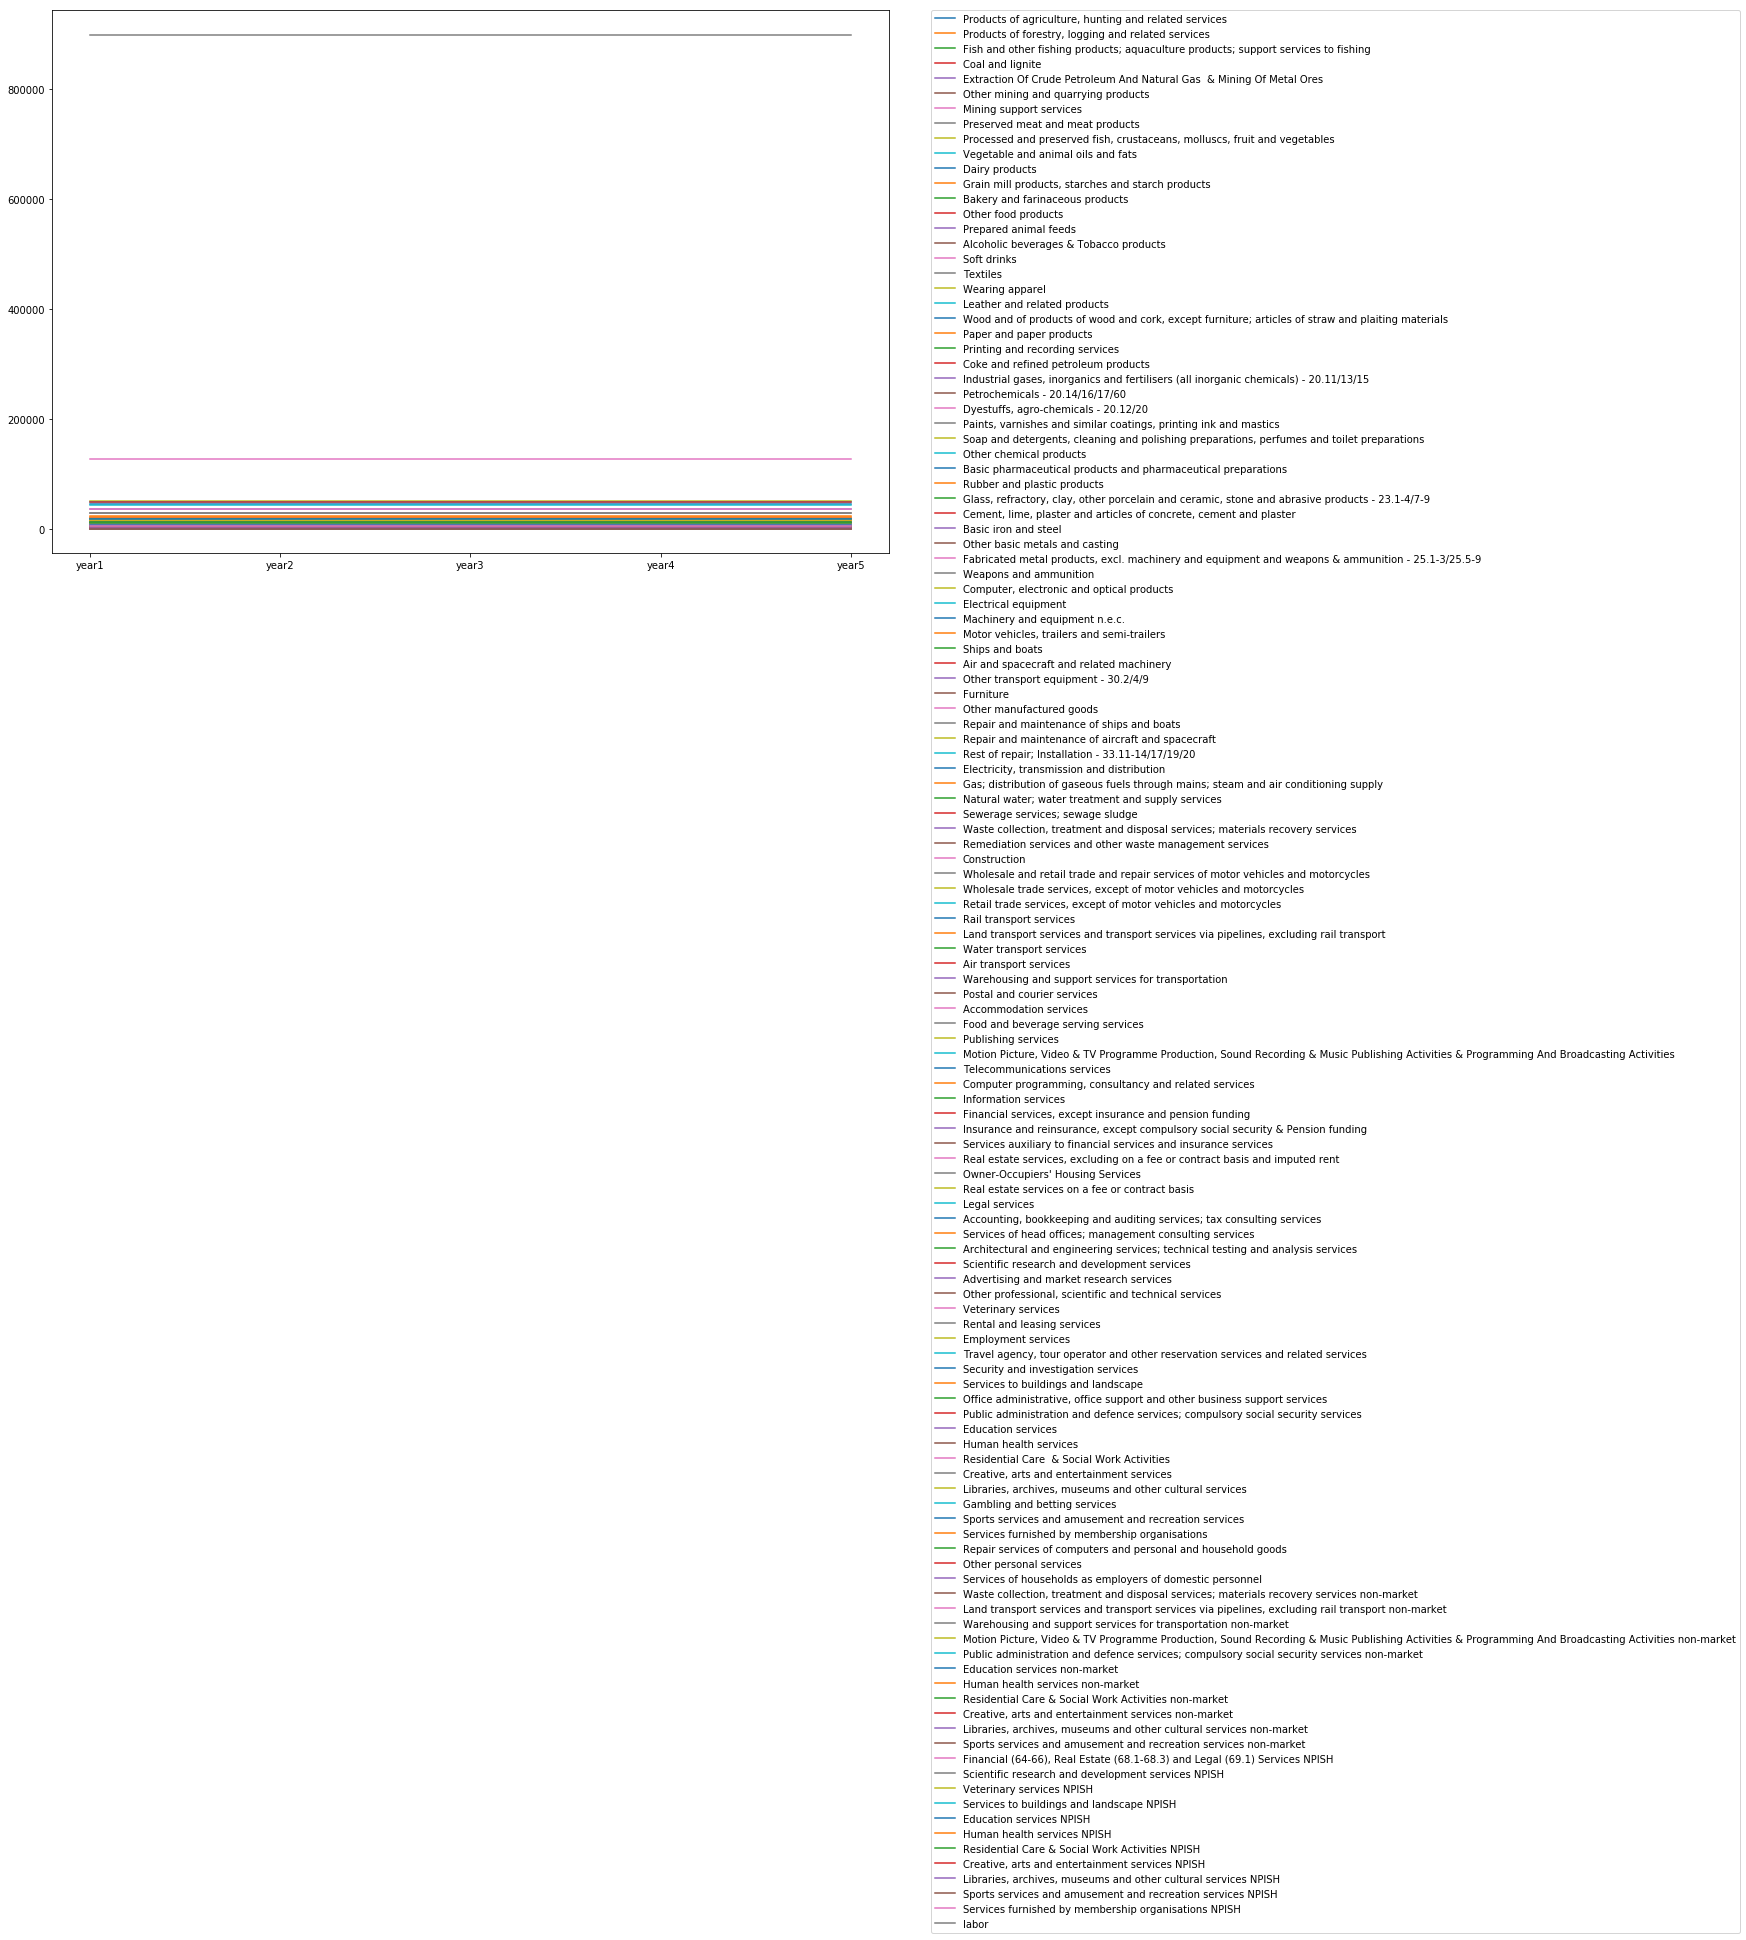

In [18]:
import matplotlib.pyplot as plt

years = list(plan_targets['headings'])

for p in targets:
    plt.plot(years, list(plan_targets[p]), label=p)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

## Solution

### Target Fulfillment

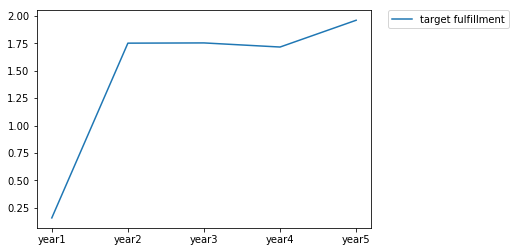

In [6]:
target_fulfillment = pd.read_csv('../out/test_data/target_fulfillment_in_year.csv')

plt.plot(years, target_fulfillment.iloc[:,1], label='target fulfillment')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.rcParams['figure.figsize'] = [15, 5]
plt.show()

### Labor in Years

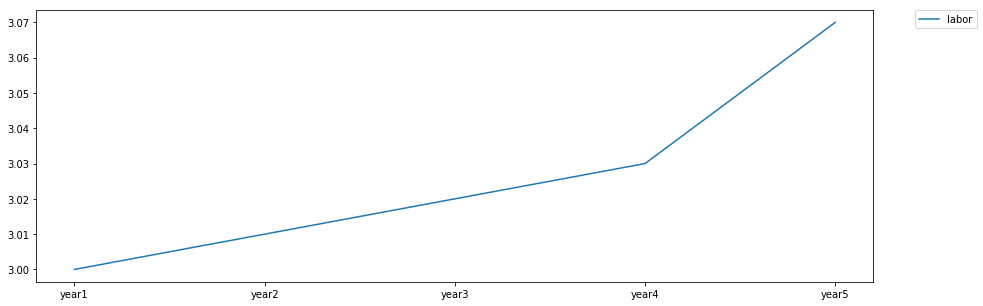

In [8]:
target_fulfillment = pd.read_csv('../out/test_data/labor_in_year.csv')

plt.plot(years, target_fulfillment.iloc[:,1], label='labor')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.rcParams['figure.figsize'] = [15, 5]
plt.show()

### Labor for Products

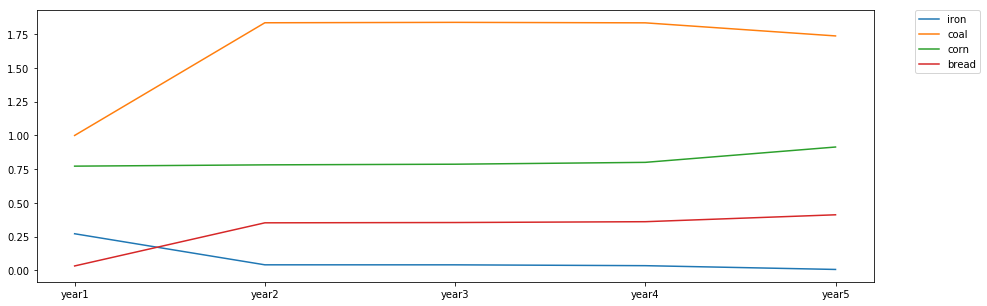

In [9]:
labor_for = pd.read_csv('../out/test_data/labor_for.csv')

for p in products:
    plt.plot(years, list(labor_for[p]), label=p)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

### Output of Products

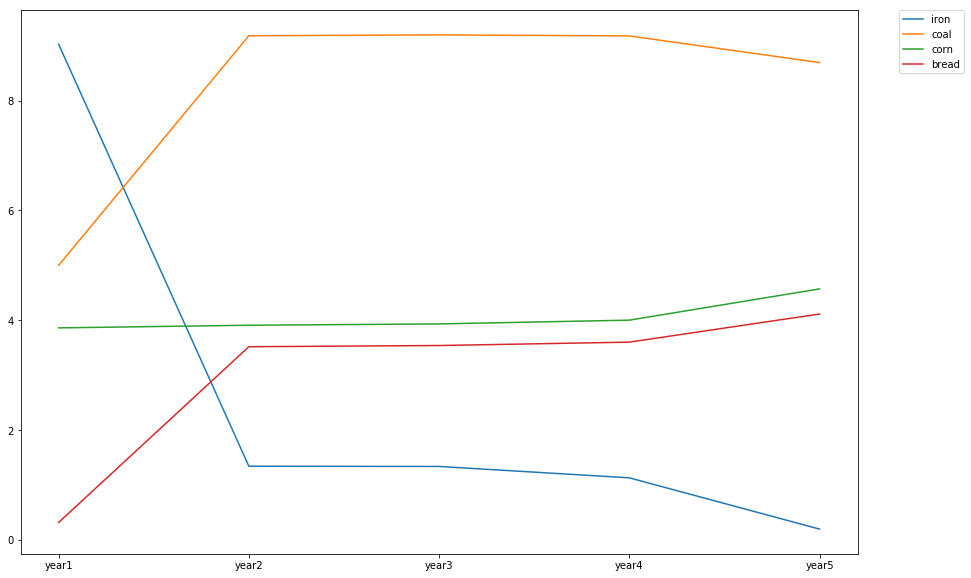

In [10]:
output_of = pd.read_csv('../out/test_data/output_of.csv')

for p in products:
    plt.plot(years, list(output_of[p]), label=p)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

### Accumulation of Products

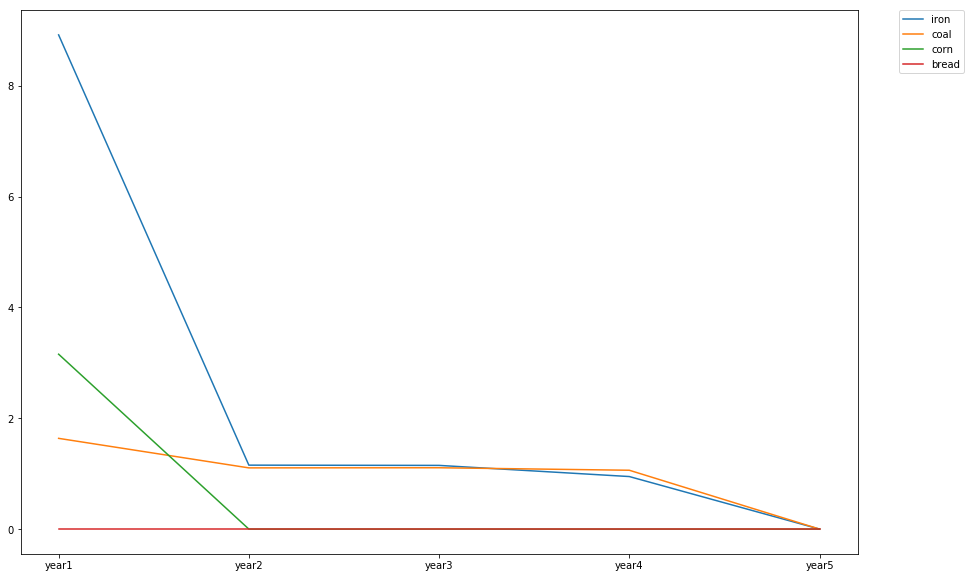

In [11]:
accumulation = pd.read_csv('../out/test_data/accumulation_of.csv')

for p in products:
    plt.plot(years, list(accumulation[p]), label=p)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

### Productive Consumption of Products

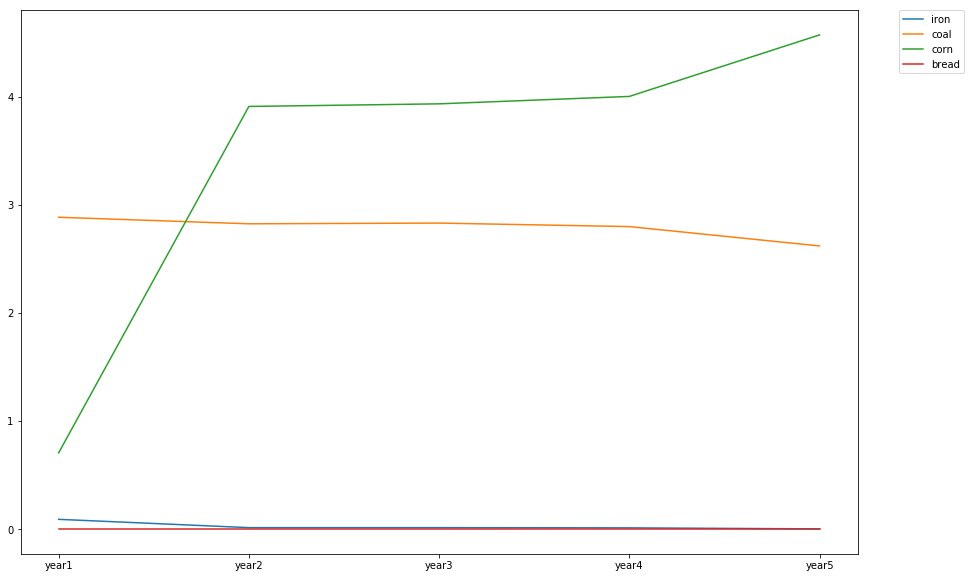

In [12]:
productive_consumption = pd.read_csv('../out/test_data/productive_consumption_of.csv')

for p in products:
    plt.plot(years, list(productive_consumption[p]), label=p)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

### Final Consumption of Products vs Targets

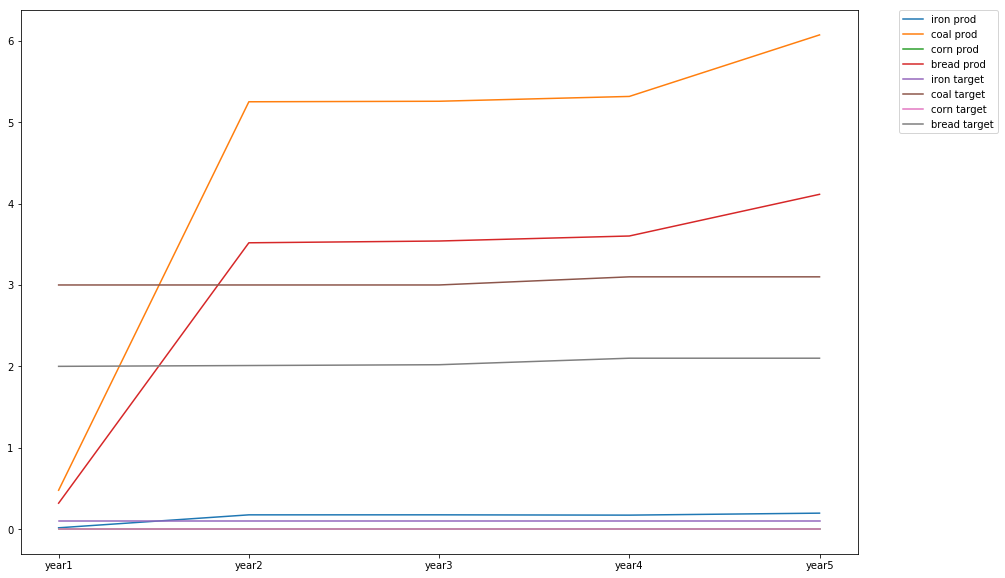

In [13]:
final_consumption = pd.read_csv('../out/test_data/final_consumption_of.csv')

for p in products:
    plt.plot(years, list(final_consumption[p]), label=f"{p} prod")
for p in products:
    plt.plot(years, list(plan_targets[p]), label=f"{p} target")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()